## '한국 복지 패널 데이터'를 이용한 데이터 분석
### 연령대별 이혼율 분석하기

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'figure.figsize': "8, 6"})
plt.rcParams.update({'font.family' : 'Malgun Gothic'})

pd.set_option('display.max_rows', 100)     # 행은 최대 100까지 출력
pd.set_option('display.max_columns', None) # 열은 무제한 출력

raw = pd.read_spss('./Koweps_hpwc17_2022_beta1.sav');
print(type(raw))

# 1~17차 머지데이터_변수명.xlsx
raw=raw.rename(
columns={'h17_g3'     : 'gender',         #  성별, 1: 남, 2: 여
         'h17_g4'     : 'birth',          #  태어난 연도
         'h17_g10'    : 'marriage_type',  #  혼인 상태
         'h17_g11'    : 'religion',       #  종교, 1: 있음, 2: 없음
         'p1702_8aq1' : 'income',         #  일한달의 월 평균 임금 
         'h17_eco9'   : 'code_job',       #  직업 코드
         'h17_reg7'   : 'code_region'})   #  7개 권역별 지역구분

# 직종 코드 확인
# list_job=pd.read_excel('./Koweps_Codebook_2022.xlsx', sheet_name='직종코드')
# print(type(list_job))
# print(list_job.head(5))

# 직종의 merge
# raw=raw.merge(list_job, how='left', on='code_job')
# raw[['code_job', 'job']].head(5)

# 성별 변경
# raw['gender'] = np.where(raw['gender'] == 1, 'male', 'female')
# raw['gender'].head(3)

# 연령
raw=raw.assign(age=((2023-raw['birth']))) # 만나이

# 연령대 파생 변수 제작
# age < 30: young, age < 60: middle, old
raw=raw.assign(ageg=np.where(raw['age'] < 30, 'young', np.where(raw['age'] < 60, 'middle', 'old')))

# marriage 파생 변수 제작
# 1: 유배우, 3: 이혼 -> 1: marriage, 2: divorce, 3: etc
def marrage(x):
    sw=''
    if x==1:
        sw='marriage'
    elif x==3:
        sw='divorce'
    else:
        sw='etc'
        
    return sw

raw['marriage']=raw['marriage_type'].apply(marrage)

plt.rcParams.update({'figure.figsize': "6, 4"})
plt.rcParams.update({'font.family' : 'Malgun Gothic'})

<class 'pandas.core.frame.DataFrame'>


In [2]:
df=raw.copy()
df=df[['ageg', 'marriage']]
df=df.query('marriage != "etc"')
df.head(3)

,ageg,marriage
2,old,divorce
3,old,marriage
4,old,marriage


In [3]:
# 연령대별 이혼률표
df2=df.groupby(['ageg', 'marriage'], as_index=False).agg(n=('marriage', 'count'))
df2

,ageg,marriage,n
0,middle,divorce,363
1,middle,marriage,3599
2,old,divorce,526
3,old,marriage,4852
4,young,divorce,4
5,young,marriage,49


In [4]:
# pandas 1.4 미만 사용 방법 ★
youngtot = df2.query('ageg=="young"')['n'].sum()
print(youngtot)
middletot = df2.query('ageg=="middle"')['n'].sum()
oldtot = df2.query('ageg=="old"')['n'].sum()

53


In [6]:
df2['proportion']=np.where(df2['ageg']=='young', df2['n']/youngtot, \
      np.where(df2['ageg']=='middle', df2['n']/middletot, df2['n']/oldtot))
df2

,ageg,marriage,n,proportion
0,middle,divorce,363,0.091620
1,middle,marriage,3599,0.908380
2,old,divorce,526,0.097806
3,old,marriage,4852,0.902194
4,young,divorce,4,0.075472
5,young,marriage,49,0.924528


In [7]:
df2=df2.query('marriage=="divorce"') # 이혼 자료만 필터링
df2['proportion'] = round(df2['proportion'] * 100, 2)
df2

,ageg,marriage,n,proportion
0,middle,divorce,363,9.16
2,old,divorce,526,9.78
4,young,divorce,4,7.55


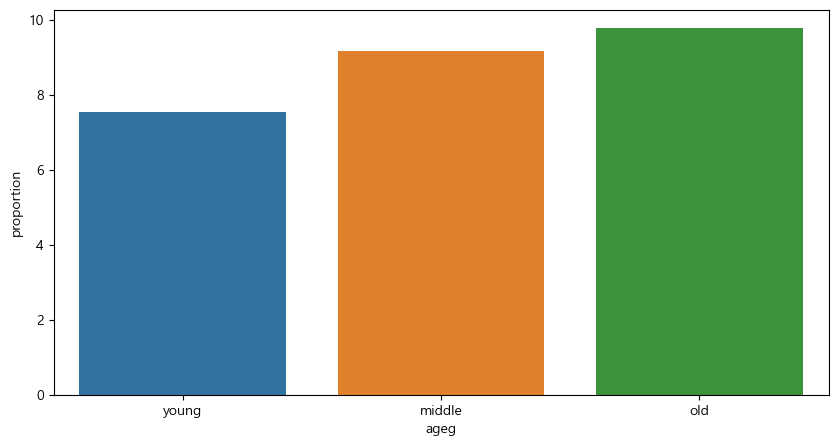

In [11]:
plt.rcParams.update({'figure.figsize': "10, 5"})
sns.barplot(data=df2, x='ageg', y='proportion', order=['young', 'middle', 'old']);

In [ ]:
# 분석결과에 대한 스토리텔링 제작을 다양한 자료의 검색 및 확인이 필요함.
# 같은 분석 결과라고 하더라도 분석가의 설명이 전혀 다른 이미지를 전달 할 수 있음.
# 우수한 전달력을위해 인문학적인 지식이 필요함.